In [29]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from os.path import join
import os
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt


In [11]:
sample_md = pd.read_pickle('pickle_df')

In [12]:
alpha_div_fp = '/home/johnchase/office-project/office-microbes/notebooks/UNITE-analysis/core_div/core_div_open/arare_max999/alpha_div_collated/observed_species.txt'
alpha_div = pd.read_csv(alpha_div_fp, sep='\t', index_col=0)
alpha_div = alpha_div.T.drop(['sequences per sample', 'iteration'])
alpha_cols = [e for e in alpha_div.columns if '990' in e]
alpha_div = alpha_div[alpha_cols]

In [13]:
sample_md = pd.concat([sample_md, alpha_div], axis=1, join='outer')
sample_md['MeanAlphaITS'] = sample_md[alpha_cols].mean(axis=1)

In [19]:
alpha_div_fp = '/home/office-microbe-files/core_div_out/arare_max1000/alpha_div_collated/observed_otus.txt'
alpha_div = pd.read_csv(alpha_div_fp, sep='\t', index_col=0)
alpha_div = alpha_div.T.drop(['sequences per sample', 'iteration'])
alpha_cols = [e for e in alpha_div.columns if '1000' in e]
alpha_div = alpha_div[alpha_cols]

In [20]:
sample_md = pd.concat([sample_md, alpha_div], axis=1, join='outer')
sample_md['MeanAlpha16S'] = sample_md[alpha_cols].mean(axis=1)

In [21]:
wa_its = sample_md[(sample_md['wa_day'].notnull()) & (sample_md['MeanAlphaITS'].notnull())].copy()
wa_16s = sample_md[(sample_md['wa_day'].notnull()) & (sample_md['MeanAlpha16S'].notnull())].copy()
wa_its['normed'] = wa_its['MeanAlphaITS']/wa_its['MeanAlphaITS'].max()
wa_16s['normed'] = wa_16s['MeanAlpha16S']/wa_16s['MeanAlpha16S'].max()

In [22]:
its_16s_corr = wa_16s.drop_duplicates('ProjectID')
its_its_corr = wa_its.drop_duplicates('ProjectID')

its_16s_corr = its_16s_corr.set_index('ProjectID')[['MeanAlpha16S']].copy()
its_its_corr = its_its_corr.set_index('ProjectID')[['MeanAlphaITS']].copy()

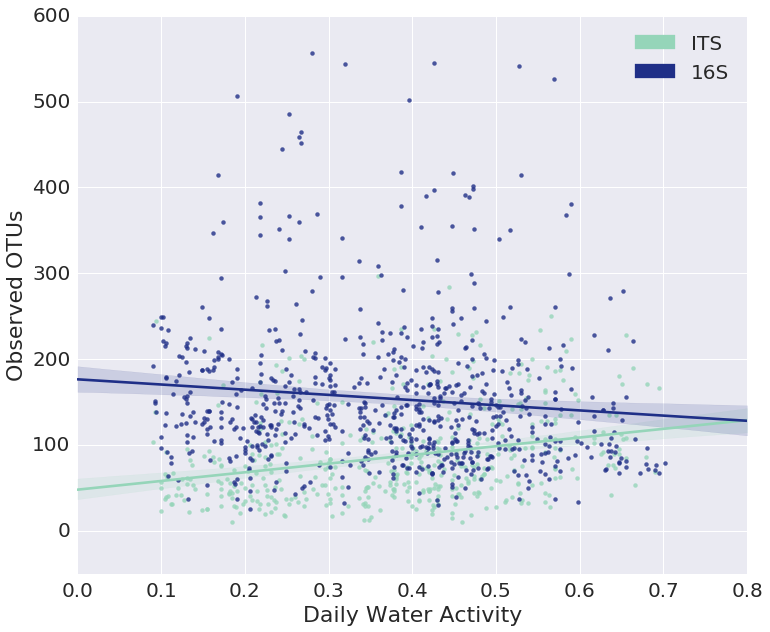

In [35]:
import matplotlib.lines as mlines

with plt.rc_context(dict(sns.axes_style("darkgrid"),
                         **sns.plotting_context("notebook", font_scale=2))):

    plt.figure(figsize=(12, 10))
    ax = sns.regplot(x='wa_day', y='MeanAlphaITS', data=wa_its, color='#95d5b9', label='ITS')
    ax = sns.regplot(x='wa_day', y='MeanAlpha16S', data=wa_16s, color='#1f2f87', label='16S')
    green_patch = mpatches.Patch(color='#95d5b9', label='ITS')
    blue_patch = mpatches.Patch(color='#1f2f87', label='16S')

    plt.legend(handles=[green_patch, blue_patch])
    ax.set_xlabel('Daily Water Activity')
    ax.set_ylim(-50, 600)
    ax.set_ylabel('Observed OTUs')
plt.savefig('figure-6.svg', dpi=300)
